# Lending Club Case Study

## Table of Contents
- **Objective**
    > Lending Club wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. This information can then be leveraged for its portfolio and risk assessment. We will use **Exploratory Data Analysis** technique to identify and analysis the **loan.csv** dataset.
- **Technologies Used**
    > Python, Pandas, Jupyter Notebook
- **Analysis**
    * Data Understanding
    * Data Cleaning
    * Data Analysis
    * Recommendations

# Data Understanding

<span style="color:blue;background-color: #f6f8ff;size:14px;padding: 5px;font-size: large;">Importing the necessary libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

<span style="color:blue;background-color: #f6f8ff;size:14px;padding: 5px;font-size: large;">
    We will now read the data from loan.csv using read_csv method and will display the top 5 rows using head method</span>

In [2]:
loan_main_df = pd.read_csv('loan.csv')  # loan_data_main is the Dataframe variable for reading the csv file
loan_main_df.head(5) # to check the top 5 rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<span style="color:blue;background-color: #f6f8ff;size:14px;padding: 5px;font-size: large;">We will check few more parameters to understand the data better</span>

In [3]:
print("Let us see the shape of our Dataframe")
loan_main_df.shape

Let us see the shape of our Dataframe


(39717, 111)

In [4]:
print("Few more insights")
loan_main_df.info()

Few more insights
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
print("Number of columns?")
loan_main_df.columns

Number of columns?


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
print("Understanding the numerical data")
loan_main_df.describe()

Understanding the numerical data


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<span style="color:blue;background-color: #f6f8ff;size:14px;padding: 5px;font-size: large;">The above describe had scientific notation, to understand it better, we will suppress it using lambda function<span>

In [7]:
loan_main_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.000000,0.000000,39717.000000,0.000000,0.000000,0.000000,39717.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39661.000000,39717.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39020.000000,39678.000000,0.000000,0.000000,0.000000,0.000000
mean,683131.913060,850463.559408,11219.443815,10947.713196,10397.448868,324.561922,68968.926377,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.000000,nan,1.000000,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.043260,0.000000,nan,nan,nan,nan
std,210694.132915,265678.307421,7456.670694,7187.238670,7128.450439,208.874874,63793.765790,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.000000,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.204324,0.000000,nan,nan,nan,nan
min,54734.000000,70699.000000,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,1.000000,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan,nan,nan,nan
25%,516221.000000,666780.000000,5500.000000,5400.000000,5000.000000,167.020000,40404.000000,

<span style="color:blue;background-color: #f6f8ff;size:14px;padding: 5px;font-size: large;">Let us see the number of unique values for each column

In [8]:
loan_main_df.nunique(axis=0)

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


### **Conclusion:** 
<span style="color:#006400;background-color: #f6f8ff;font-size: large;">From the above data, we can see that our dataset has 39717 rows and 111 columns with first column as id and last column as total_il_high_credit_limit. We can see that many columns have 0 entries and NAN values which we will address in Data Cleaning. While doing the describe, the probability of outliers present for columns such as : annual_inc, loan_amount etc, we will analyze it using boxplot and remove the outliers if present.<span>

# Data Cleaning
   <span style="color:blue;background-color: #f6f8ff;font-size: large">We will clean the data now in a systematic approach, starting with the removal of unwanted cloumns, outliers treatment, null or nan values cleanup, removing redundancies, formatting etc</span>

`> While understanding data, we saw many columns had "0" unique values which will not contribute to our analysis
Let us first identify the perc of missing values for each column`

In [9]:
round(loan_main_df.isnull().sum()/len(loan_main_df.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


<span style="color:blue;background-color: #f6f8ff;size:14px;padding: 5px;font-size: large;">Value of 100 in the above response means these columns have 100% missing values, let us identify them first</span>

In [10]:
missing_cols_100 = loan_main_df.columns[100*(loan_main_df.isnull().sum()/len(loan_main_df.index)) == 100.0]
print(missing_cols_100)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

<span style="color:blue;background-color: #f6f8ff;font-size: large">Let us now drop these columns and check the shape of the data</span>

In [11]:
loan_main_df = loan_main_df.drop(missing_cols_100, axis=1)
print(loan_main_df.shape)

(39717, 57)


<span style="color:blue;background-color: #f6f8ff;font-size: large">Let us now again see the perc of data with missing values</span>

In [12]:
round(loan_main_df.isnull().sum()/len(loan_main_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

<span style="color:blue;background-color: #f6f8ff;font-size: large">From the above response,missing values for two cols: next_pymnt_d, mths_since_last_record > 90%,not useful for us
Dropping both the columns</span>

In [13]:
loan_main_df = loan_main_df.drop(['next_pymnt_d','mths_since_last_record'], axis=1)
#Checking the shape again
print(loan_main_df.shape)

(39717, 55)


<span style="color:blue;background-color: #f6f8ff;font-size: large">Let us now again see the perc of data with missing values</span>

In [14]:
round(loan_main_df.isnull().sum()/len(loan_main_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

<span style="color:blue;background-color: #f6f8ff;font-size: large">Let's analyze cols='mths_since_last_delinq','desc' which has 33% and 65% null values</span>
>###### As per Data Dictionary, 
    - 'desc': Loan description provided by the borrower
    - 'mths_since_last_delinq': The number of months since the borrower's last delinquency

<span style="color:blue;background-color: #f6f8ff;font-size: large">Both columns are not relevant for our analysis and can be dropped<span>

In [15]:
loan_main_df = loan_main_df.drop(['desc','mths_since_last_delinq'], axis=1)

<span style="color:blue;background-color: #f6f8ff;font-size: large">Let's now check format of the remaining columns<span>

In [16]:
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

<span style="color:blue;background-color: #f6f8ff;font-size: large">There are few columns which we can drop as they do not contribute for analyis -> Mostly User Related Columns</span>

In [17]:
unwanted_columns_1 = ['id',
                              'member_id',
                              'emp_title',
                              'title',
                              'url',
                              'zip_code',
                              'addr_state',
                              'application_type',
                              'policy_code',
                              'pymnt_plan'
                              ]
loan_main_df = loan_main_df.drop(unwanted_columns_1, axis=1)
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

<span style="color:blue;background-color: #f6f8ff;font-size: large">
 Few Columns are imp for post loan but not usable for our analysis and can be dropped.
</span>

> **Column names:** last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,collection_recovery_fee,
recoveries,total_rec_late_fee,total_rec_int,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,out_prncp,delinq_2yrs 

In [18]:
unwanted_columns_2 = ['last_credit_pull_d',
                      'last_pymnt_amnt',
                      'last_pymnt_d',
                      'collection_recovery_fee',
                      'recoveries',
                      'total_rec_late_fee',
                      'total_rec_int',
                      'total_rec_prncp',
                      'total_pymnt_inv',
                      'total_pymnt',
                      'out_prncp_inv',
                      'out_prncp',
                      'delinq_2yrs'                      
                     ]
loan_main_df = loan_main_df.drop(unwanted_columns_2, axis=1)
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

In [19]:
loan_main_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,5598,21%,37,f,0.0,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,15,0,27783,53.90%,38,f,0.0,0,0.0,0,0.0,0.0


<span style="color:blue;background-color: #f6f8ff;font-size: large"> Let us now identify columns which has single value and will not contribute to our analysis and we can drop them </span>

In [20]:
    loan_main_df.nunique(axis=0)

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
purpose                          14
dti                            2868
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
initial_list_status               1
collections_12_mths_ex_med        1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                 

 
 <span style="color:blue;background-color: #f6f8ff;font-size: large">Let us describe the columns with single value and their utility.</span>
    
  - `initial_list_status: The initial listing status of the loan. Possible values are – W, F`
  - `collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections`
  - `delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.`
  - `acc_now_delinq: The number of accounts on which the borrower is now delinquent.`
  - `chargeoff_within_12_mths: Number of charge-offs within 12 months`
  - `tax_liens: Number of tax liens`

In [21]:
unwanted_columns_3 = ['initial_list_status',
                      'collections_12_mths_ex_med',
                      'delinq_amnt',
                      'acc_now_delinq',
                      'chargeoff_within_12_mths',
                      'tax_liens'
                     ]
print("Printing the unique values to double check for the above list")
for x in unwanted_columns_3:
    print(x,loan_main_df[x].unique())
    

Printing the unique values to double check for the above list
initial_list_status ['f']
collections_12_mths_ex_med [ 0. nan]
delinq_amnt [0]
acc_now_delinq [0]
chargeoff_within_12_mths [ 0. nan]
tax_liens [ 0. nan]


<span style="color:blue;background-color: #f6f8ff;font-size: large"> From the above list, we can clearly see that the values of these columns are either 0 or nan or 'f' in 1 case, so we can drop these columns as well </span>

In [22]:
loan_main_df = loan_main_df.drop(unwanted_columns_3, axis=1)
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  dti                

<span style="color:blue;background-color: #f6f8ff;font-size: large"> Now post cleaning of columns, let us reduce the dataset by excluding the rows which has Loan Status as "Current" </span>

In [23]:
loan_main_df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [24]:
loan_main_df = loan_main_df[loan_main_df.loan_status != "Current"]
loan_main_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [25]:
loan_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  dti                

<span style="color:blue;background-color: #f6f8ff;font-size: large"> As we can see the number of rows have reduced from 39717 to 38577, let us now see how our data looks like </span>

In [26]:
loan_main_df.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,13648,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,1687,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,2956,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,5598,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,7963,28.30%,12,0.0


<span style="color:blue;background-color: #f6f8ff;font-size: large"> Now let us clean the data, we can clearly see from info and head results, we will go 1 by 1 </span>

In [27]:
# Let us first see emp_length column
loan_main_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [28]:
# We will define function to cater all the use cases to clean emp_length column
def emp_len_cleaning(x):
    if '<' in x:
        return 0
    elif '+' in x:
        return x.split('+')[0]
    else:
        return x.split()[0]
print(emp_len_cleaning('10+ years'))
print(emp_len_cleaning('4 years'))
print(emp_len_cleaning('< 1 year'))
print(emp_len_cleaning('1 year'))

10
4
0
1


In [29]:
#Filling emp_length column with most used value
loan_main_df.emp_length.fillna('10+ years', inplace = True)
loan_main_df.emp_length.value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [30]:
# We will now apply the above function and update our dataframe's column emp_length
loan_main_df.update(loan_main_df.emp_length.apply(emp_len_cleaning))
loan_main_df.emp_length.value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [31]:
# Let us also update the data-type of emp_length
loan_main_df['emp_length'] = loan_main_df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [32]:
loan_main_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [33]:
# The column int_rate is object, let's convert it to float
loan_main_df['int_rate'] = loan_main_df['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [34]:
loan_main_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [35]:
# Adding missing values to revol_util column
loan_main_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_main_df.revol_util.isna().sum()
# The column revol_util is object, let's convert it to float
loan_main_df.revol_util = pd.to_numeric(loan_main_df.revol_util.apply(lambda x : x.split('%')[0]))

In [36]:
loan_main_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [37]:
#let us check the head once again
loan_main_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,13648,83.7,9,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,1687,9.4,4,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,2956,98.5,10,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,5598,21.0,37,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,7963,28.3,12,0.0
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,17726,85.6,11,0.0
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35,Jan-07,2,4,0,8221,87.5,4,0.0
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55,Apr-04,2,11,0,5210,32.6,13,0.0
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08,Sep-04,0,2,0,9279,36.5,3,0.0
10,6500,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,16.12,Jan-98,2,14,0,4032,20.6,23,0.0


In [38]:
#There are few date columns, we can split and standardize them as well but let's first convert them to datetime format
datetime_colmns=['issue_d','earliest_cr_line']
loan_main_df.issue_d = pd.to_datetime(loan_main_df.issue_d, format='%b-%y')
loan_main_df.earliest_cr_line = pd.to_datetime(loan_main_df.earliest_cr_line, format='%b-%y')

In [39]:
loan_main_df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                       int64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
dti                            float64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
pub_rec_bankruptcies           float64
dtype: object

In [40]:
# Let us now split these datetime columns to month and year format
loan_main_df['earliest_cr_line_month'] = loan_main_df['earliest_cr_line'].dt.month
loan_main_df['earliest_cr_line_year'] = loan_main_df['earliest_cr_line'].dt.year
loan_main_df['issue_d_month'] = loan_main_df['issue_d'].dt.month
loan_main_df['issue_d_year'] = loan_main_df['issue_d'].dt.year

In [41]:
#let us know check the new columns
loan_main_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,13648,83.7,9,0.0,1,1985,12,2011
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,1687,9.4,4,0.0,4,1999,12,2011
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,2956,98.5,10,0.0,11,2001,12,2011
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,5598,21.0,37,0.0,2,1996,12,2011
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,7963,28.3,12,0.0,11,2004,12,2011
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,23.51,2005-07-01,1,7,0,17726,85.6,11,0.0,7,2005,12,2011
7,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,5.35,2007-01-01,2,4,0,8221,87.5,4,0.0,1,2007,12,2011
8,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,5.55,2004-04-01,2,11,0,5210,32.6,13,0.0,4,2004,12,2011
9,5375,5375,5350.0,60 months,12.69,121.45,B,B5,0,RENT,15000.0,Verified,2011-12-01,Charged Off,other,18.08,2004-09-01,0,2,0,9279,36.5,3,0.0,9,2004,12,2011
10,6500,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,16.12,1998-01-01,2,14,0,4032,20.6,23,0.0,1,1998,12,2011


In [42]:
#let us now describe and check data sanctity of new columns
loan_main_df.earliest_cr_line_year.describe()

count    38527.000000
mean      1996.819062
std          7.378509
min       1969.000000
25%       1993.000000
50%       1998.000000
75%       2001.000000
max       2068.000000
Name: earliest_cr_line_year, dtype: float64

In [43]:
loan_main_df.earliest_cr_line_month.describe()

count    38527.000000
mean         6.893166
std          3.539112
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: earliest_cr_line_month, dtype: float64

In [44]:
loan_main_df.issue_d_year.describe()

count    38527.000000
mean      2010.310016
std          0.882160
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_d_year, dtype: float64

In [45]:
loan_main_df.issue_d_month.describe()

count    38527.000000
mean         7.115581
std          3.408386
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: issue_d_month, dtype: float64

In [46]:
# From the above response, it seems like there are some outliers present in earliest_cr_line_year column
#But let us first remove any duplicates from our dataset before doing outlier treatment
loan_main_df = loan_main_df.drop_duplicates()

In [47]:
loan_main_df.shape

(38527, 28)

### Outlier Treatment
<span style="color:blue;background-color: #f6f8ff;font-size: large"> We will now treat few outliers in our dataset</span>

In [48]:
# The problem statement says that the dataset is for "period 2007 t0 2011." 
# Therefore earliest_cr_line_year value cannot be greater than 2011
loan_main_df.loc[loan_main_df['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan_main_df['earliest_cr_line_year'] - 100


In [49]:
loan_main_df.earliest_cr_line_year.describe()

count    38527.000000
mean      1996.598437
std          6.815735
min       1946.000000
25%       1993.000000
50%       1998.000000
75%       2001.000000
max       2008.000000
Name: earliest_cr_line_year, dtype: float64

<span style="color:blue;background-color: #f6f8ff;font-size: large"> The above example was for a categorical data, let us now do the outlier treatment for a numerical column as well </span>

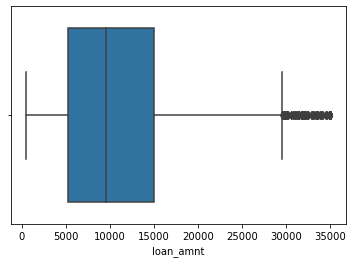

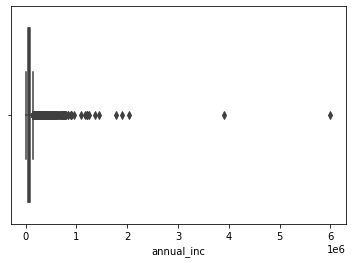

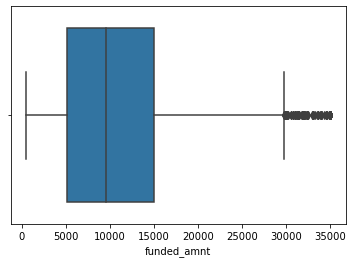

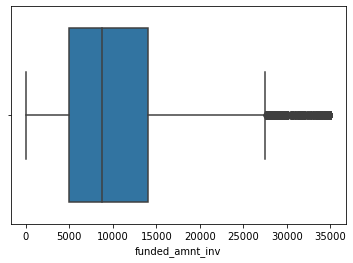

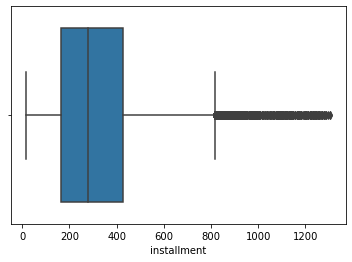

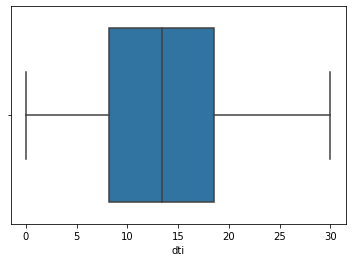

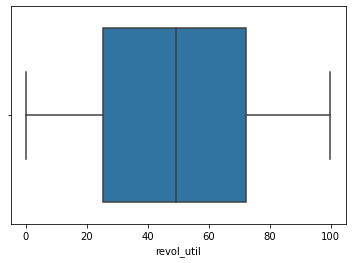

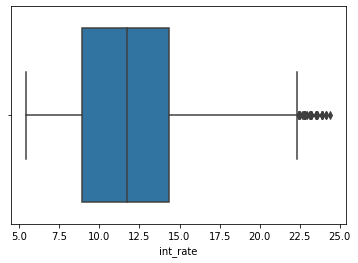

In [50]:
# Let us plot some boxplot for the numerical columns which can have outliers
numerical_columns_1 = ['loan_amnt','annual_inc','funded_amnt','funded_amnt_inv','installment','dti','revol_util','int_rate']
for x in numerical_columns_1:
    sns.boxplot(loan_main_df[x])
    plt.show()

In [51]:
#Let us check the percentile values of these cols
loan_main_df[numerical_columns_1].quantile([0.05,0.25,0.50,0.75,0.90,0.95, 0.99, 1.0],axis=0)

,loan_amnt,annual_inc,funded_amnt,funded_amnt_inv,installment,dti,revol_util,int_rate
0.05,2400.0,24000.0,2400.0,1800.000000,70.924,2.11,2.60,6.17
0.25,5325.0,40000.0,5200.0,5000.000000,165.740,8.14,25.20,8.94
0.50,9600.0,59000.0,9600.0,8750.000000,278.150,13.37,49.10,11.71
0.75,15000.0,82000.0,15000.0,14000.000000,425.860,18.56,72.30,14.35
0.90,21600.0,115000.0,20000.0,19975.000000,621.222,22.29,87.80,16.82
0.95,25000.0,140004.0,25000.0,24506.582238,760.820,23.80,93.57,18.30
0.99,35000.0,234000.0,35000.0,34721.583150,931.090,26.53,98.50,20.90
1.00,35000.0,6000000.0,35000.0,35000.000000,1305.190,29.99,99.90,24.40


In [52]:
# Let us also describe all the columns
loan_main_df[numerical_columns_1].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,loan_amnt,annual_inc,funded_amnt,funded_amnt_inv,installment,dti,revol_util,int_rate
count,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000,38527.000000
mean,11055.265139,68809.228611,10791.956939,10230.940095,322.678650,13.276353,48.702777,11.927378
std,7348.433587,64214.926394,7090.256225,7022.678989,208.649278,6.671392,28.364741,3.690161
min,500.000000,4000.000000,500.000000,0.000000,15.690000,0.000000,0.000000,5.420000
25%,5325.000000,40000.000000,5200.000000,5000.000000,165.740000,8.140000,25.200000,8.940000
50%,9600.000000,59000.000000,9600.000000,8750.000000,278.150000,13.370000,49.100000,11.710000
75%,15000.000000,82000.000000,15000.000000,14000.000000,425.860000,18.560000,72.300000,14.350000
max,35000.000000,6000000.000000,35000.000000,35000.000000,1305.190000,29.990000,99.900000,24.400000


<span style="color:blue;background-color: #f6f8ff;font-size: large"> Although from the above data, outlier seems to be with only annual_inc and installment col, but we will clean for all</span>

In [53]:
# From the above, let us clear some data
cols = ['loan_amnt','annual_inc','installment']
low = .05
high = .95
filter_df = loan_main_df[cols]
quant_df = filter_df.quantile([low, high])
print(quant_df)

      loan_amnt  annual_inc  installment
0.05     2400.0     24000.0       70.924
0.95    25000.0    140004.0      760.820


In [54]:
filter_df = filter_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x <= quant_df.loc[high,x.name])], axis=0)
loan_main_df[cols] = filter_df

In [55]:
#Let us again check the percentile values of these cols
loan_main_df[numerical_columns_1].quantile([0.05,0.25,0.50,0.75,0.90,0.95, 0.99, 1.0],axis=0)

,loan_amnt,annual_inc,funded_amnt,funded_amnt_inv,installment,dti,revol_util,int_rate
0.05,3000.0,28800.0,2400.0,1800.000000,97.64,2.11,2.60,6.17
0.25,6000.0,42000.0,5200.0,5000.000000,174.75,8.14,25.20,8.94
0.50,10000.0,58500.0,9600.0,8750.000000,278.15,13.37,49.10,11.71
0.75,15000.0,79992.0,15000.0,14000.000000,403.42,18.56,72.30,14.35
0.90,20000.0,101000.0,20000.0,19975.000000,542.77,22.29,87.80,16.82
0.95,24000.0,119000.0,25000.0,24506.582238,632.14,23.80,93.57,18.30
0.99,25000.0,135000.0,35000.0,34721.583150,713.49,26.53,98.50,20.90
1.00,25000.0,140004.0,35000.0,35000.000000,760.82,29.99,99.90,24.40


In [56]:
# Let us also describe all the columns
loan_main_df[numerical_columns_1].describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,loan_amnt,annual_inc,funded_amnt,funded_amnt_inv,installment,dti,revol_util,int_rate
count,35221.000000,34837.000000,38527.000000,38527.000000,34676.000000,38527.000000,38527.000000,38527.000000
mean,10715.206837,63075.776071,10791.956939,10230.940095,306.652945,13.276353,48.702777,11.927378
std,6038.285087,26627.257517,7090.256225,7022.678989,161.058152,6.671392,28.364741,3.690161
min,2400.000000,24000.000000,500.000000,0.000000,70.980000,0.000000,0.000000,5.420000
25%,6000.000000,42000.000000,5200.000000,5000.000000,174.750000,8.140000,25.200000,8.940000
50%,10000.000000,58500.000000,9600.000000,8750.000000,278.150000,13.370000,49.100000,11.710000
75%,15000.000000,79992.000000,15000.000000,14000.000000,403.420000,18.560000,72.300000,14.350000
max,25000.000000,140004.000000,35000.000000,35000.000000,760.820000,29.990000,99.900000,24.400000


In [57]:
loan_main_df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [58]:
# Checking for null values to clean up
loan_main_df.isnull().sum()

loan_amnt                 3306
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment               3851
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                3690
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
dti                          0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
pub_rec_bankruptcies       697
earliest_cr_line_month       0
earliest_cr_line_year        0
issue_d_month                0
issue_d_year                 0
dtype: int64

In [59]:
# home_ownership column
loan_main_df["home_ownership"].value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [60]:
# Changes in home_ownership column. Replace None with Other
loan_main_df['home_ownership']=loan_main_df['home_ownership'].replace('NONE', 'OTHER')

In [61]:
# Creating derived metrics -- Loan to income ratio
loan_main_df['loan_income_ratio']= loan_main_df['loan_amnt']/loan_main_df['annual_inc']

In [62]:
# Dropping the NA values
loan_main_df.dropna(inplace=True)

<span style="color:blue;background-color: #f6f8ff;font-size: large"> Let us once again run boxplot to check the outliers </span>

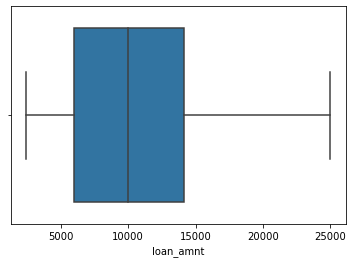

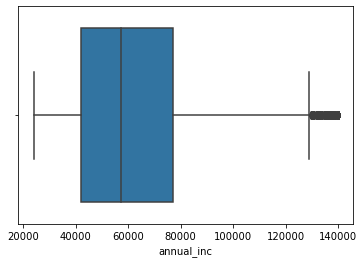

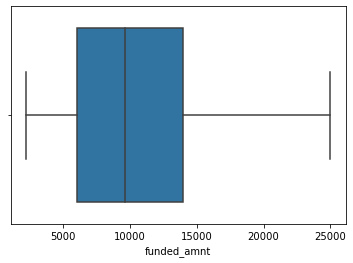

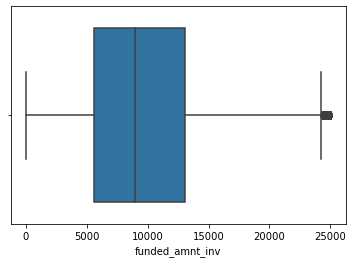

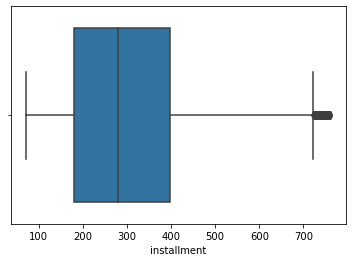

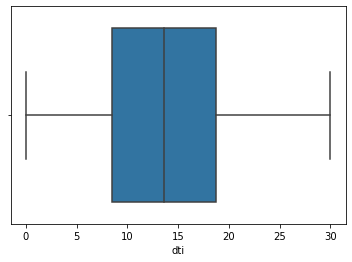

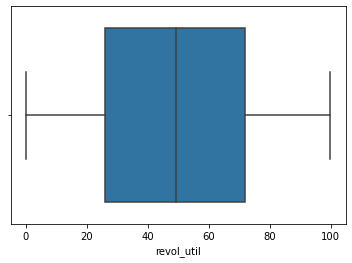

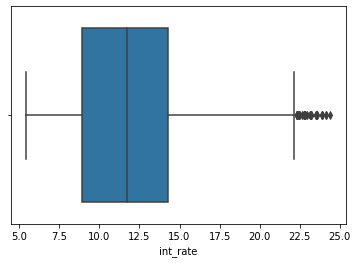

In [63]:
for x in numerical_columns_1:
    sns.boxplot(loan_main_df[x])
    plt.show()

In [64]:
loan_main_df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,loan_income_ratio
0,5000.0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,13648,83.7,9,0.0,1,1985,12,2011,0.208333
3,10000.0,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,5598,21.0,37,0.0,2,1996,12,2011,0.203252
5,5000.0,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,7963,28.3,12,0.0,11,2004,12,2011,0.138889
6,7000.0,7000,7000.0,60 months,15.96,170.08,C,C5,8,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,23.51,2005-07-01,1,7,0,17726,85.6,11,0.0,7,2005,12,2011,0.148923
7,3000.0,3000,3000.0,36 months,18.64,109.43,E,E1,9,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,5.35,2007-01-01,2,4,0,8221,87.5,4,0.0,1,2007,12,2011,0.062500
8,5600.0,5600,5600.0,60 months,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,5.55,2004-04-01,2,11,0,5210,32.6,13,0.0,4,2004,12,2011,0.140000
10,6500.0,6500,6500.0,60 months,14.65,153.45,C,C3,5,OWN,72000.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,16.12,1998-01-01,2,14,0,4032,20.6,23,0.0,1,1998,12,2011,0.090278
11,12000.0,12000,12000.0,36 months,12.69,402.54,B,B5,10,OWN,75000.0,Source Verified,2011-12-01,Fully Paid,debt_consolidation,10.78,1989-10-01,0,12,0,23336,67.1,34,0.0,10,1989,12,2011,0.160000
12,9000.0,9000,9000.0,36 months,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,debt_consolidation,10.08,2004-04-01,1,4,0,10452,91.7,9,0.0,4,2004,12,2011,0.300000
14,10000.0,10000,10000.0,36 months,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,2011-12-01,Charged Off,other,7.06,1991-05-01,2,14,0,11997,55.5,29,0.0,5,1991,12,2011,0.100000


## Conclusion
<span style="color:#006400;background-color: #f6f8ff;font-size: large">
    We performed bunch of data cleaning techniques to clean our data, we used the following methods:
    <li> Identification and removal of Columns which are not useful
    <li> removal of column with "0" unique values
    <li> Removing data with 'Current' loan status
    <li> Cleanup of emp_length column
    <li> Formatting changes
    <li> Datatype Changes
    <li> Date Format Changes
    <li> Value Substitution
    <li> Adding missing values
    <li> Outlier Treatment using Quartile method
    <li> Deduplicate rows removal
    <li> NaN value rows removal
    <li> Created Derived Metrics </li>    
Now with the clean data, we can perform our analysis
</p>

# Data Analysis

## Univariate Analysis, Segmented Univariate Analysis, Derived Metrics & Bivariate Analysis

<span style="color:blue;background-color: #f6f8ff;font-size: large"> First we will do some formatting for our plots, we will reference the existing code from https://stackoverflow.com/a/48372659 and create reference Plot functions to use while doing the analysis</span>

In [65]:
def showLabels(ax, d):
    #plt.margins(0.1, 0.1)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks()  
    counts = {}
    if type(d) is not float:
        for key, value in d.items():
            counts[str(key)] = value
    
    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if type(d) is float:
            label = '{}'.format(str(round(y_value*100/d,2)) + "%")
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
    return ax

In [66]:
def count_plot(df,col):
    total = float(len(df))
    df.sort_values(by=col,inplace=True)
    plt.figure(figsize=(13, 7))
    ax=sns.countplot(x=col, data=df,palette=sns.color_palette('pastel', 18))
    plt.margins(0.1, 0.1)
    plt.tight_layout()
    return showLabels(ax,total)

def plot_charged_off(dataframe,plotby):
    charged_off=dataframe.loc[(dataframe.loan_status== 'Charged Off')].groupby([plotby]).loan_status.count()
    totalcount = dataframe.groupby(plotby).loan_status.count()
    percentages = charged_off * 100 / totalcount
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('Charged Off % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()
    
def plot_fully_paid(dataframe,plotby):
    fully_paid=dataframe.loc[(dataframe.loan_status== 'Fully Paid')].groupby([plotby]).loan_status.count()
    totalcount = dataframe.groupby(plotby).loan_status.count()
    percentages = fully_paid * 100 / totalcount
    plt.figure(figsize=(15, 5))
    ax = percentages.plot.bar(color=sns.color_palette('pastel', 16))
    ax.set_ylabel('fully_paid % of loans ')

    ax.axhline(y=15, xmin=0, xmax=1,linestyle='--', lw=2)
    showLabels(ax, totalcount.to_dict())
    plt.margins(0.3, 0.3)
    plt.tight_layout()

### - Loan Status Column

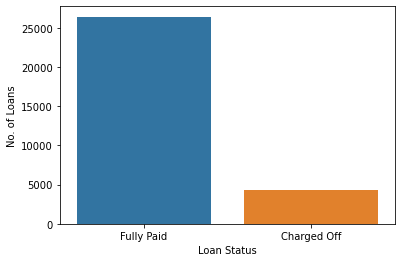

In [67]:
# We will first analyze the loan_status to understand the behaviour of Loan Status Column
figure = sns.countplot(x="loan_status", data=loan_main_df)
figure.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

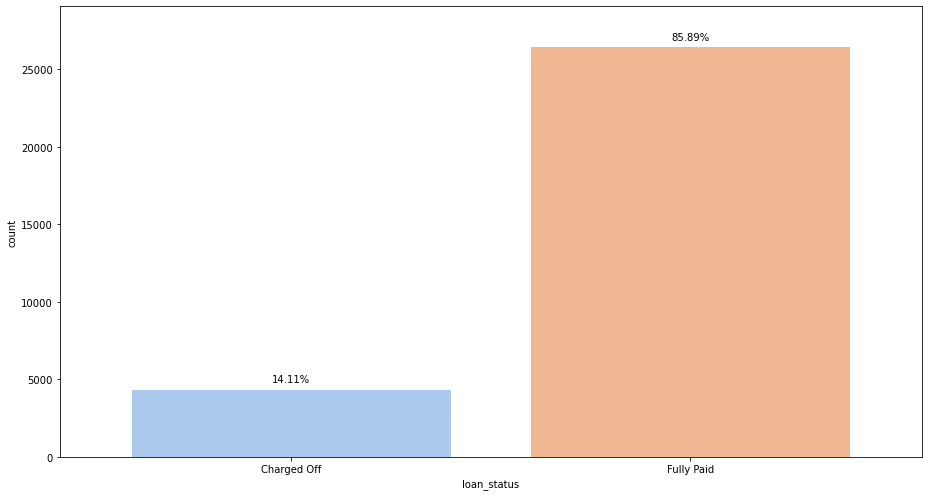

In [68]:
# Let us use the formatting functions declared above to visualize our graph better
count_plot(loan_main_df,'loan_status')
plt.show()

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> From the above analysis we can see more than 20000 loans have been fully paid which corresponds to 85.89% data and 14.11% loans are charged off</span>

### -  Grade Column

<AxesSubplot:xlabel='grade', ylabel='count'>

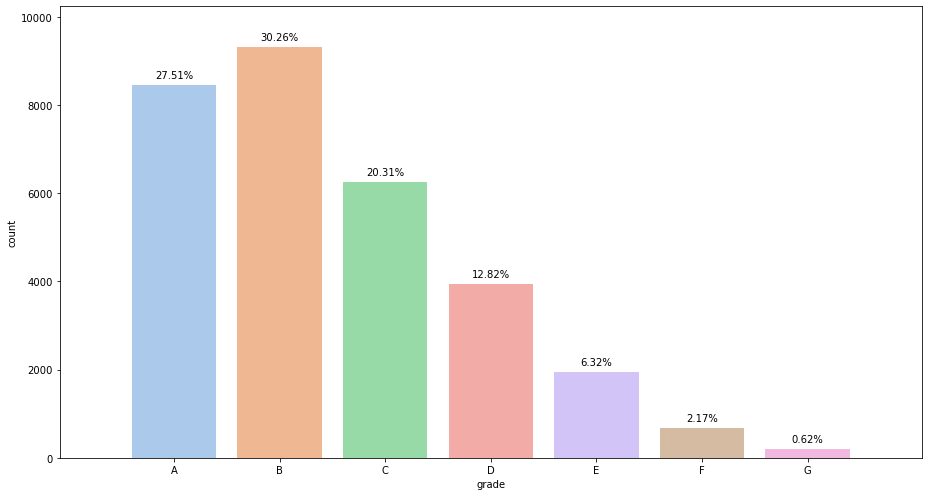

In [69]:
count_plot(loan_main_df,'grade')

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> From the above, as we move to lower grade, the count decreases but it would be great to see 'grade' with the loan status </span>

### -  Loan_status and Grade Column together

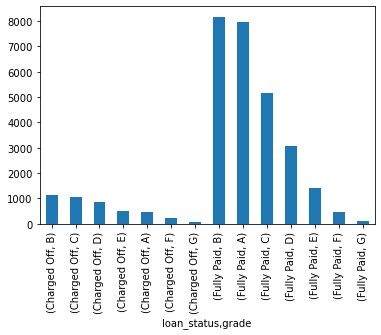

In [70]:
loan_main_df.groupby('loan_status')['grade'].value_counts().plot(kind='bar')
plt.show()

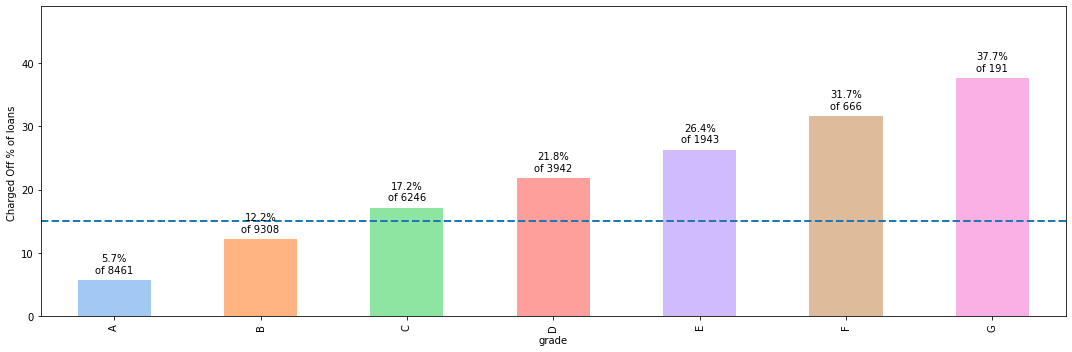

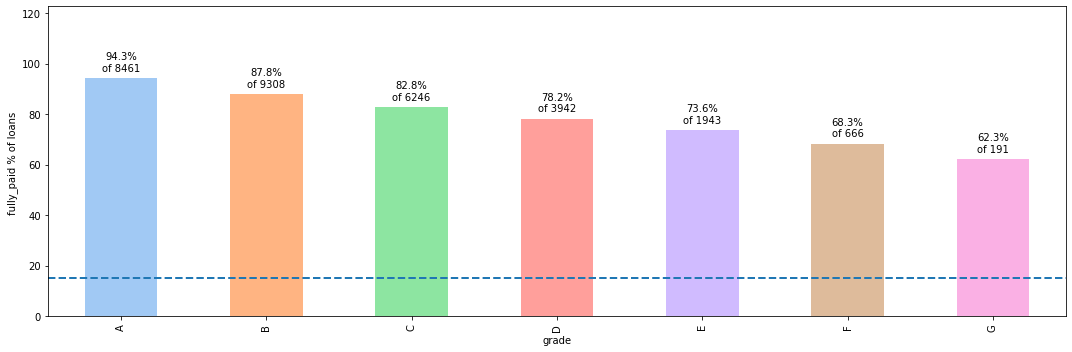

In [71]:
plot_charged_off(loan_main_df,'grade')
plot_fully_paid(loan_main_df,'grade')

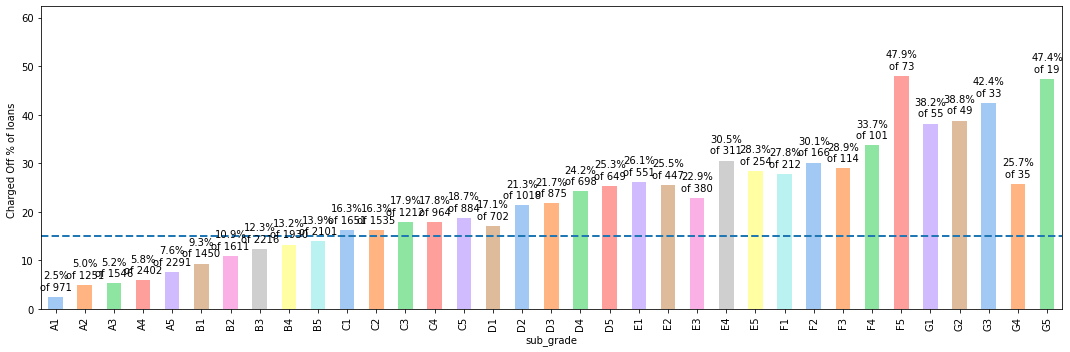

In [72]:
plot_charged_off(loan_main_df,'sub_grade')

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> Chances of defaulting increases with grade from A to G and subgrade from A1-A5, B1-B5, & so forth </span>

### - Home Ownership Column

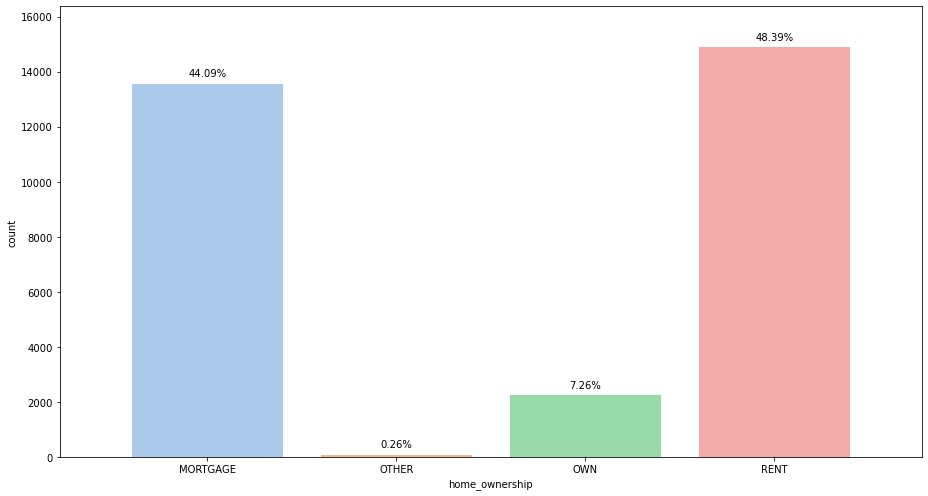

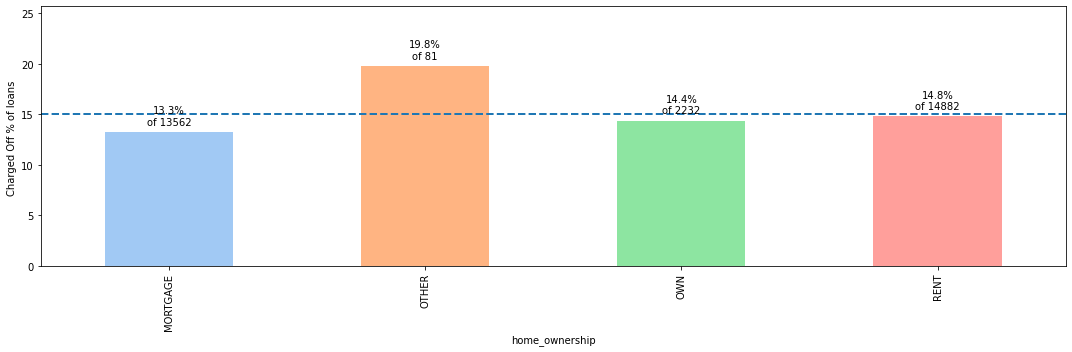

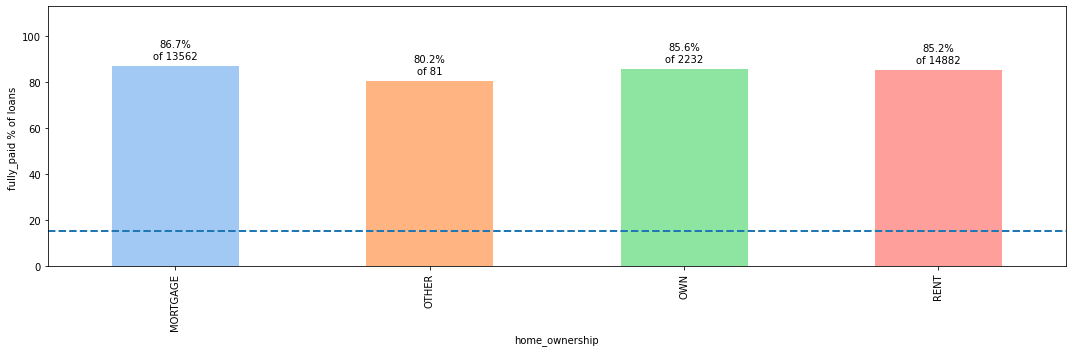

In [73]:
count_plot(loan_main_df,'home_ownership')
plot_charged_off(loan_main_df,'home_ownership')
plot_fully_paid(loan_main_df,'home_ownership')

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li> People with ownership type as Mortgage and Rent are the most who take loans.
<li> The default rate is high for people having home ownership type "other".
<li> The default rate is not significantly impacted by the home ownership status - Mortgage/Owned/Rent </li></span>

### - Loan Amount or Funded Amount? Which Column to use

In [74]:
# Let us count the difference where Loan Amount is not Equal to Funded Amou
loan_main_df[loan_main_df.loan_amnt != loan_main_df.funded_amnt].loan_amnt.count()

1395

In [75]:
loan_main_df[loan_main_df.loan_amnt != loan_main_df.funded_amnt_inv].loan_amnt.count()

15418

In [76]:
loan_main_df[loan_main_df.funded_amnt != loan_main_df.funded_amnt_inv].funded_amnt.count()

15166

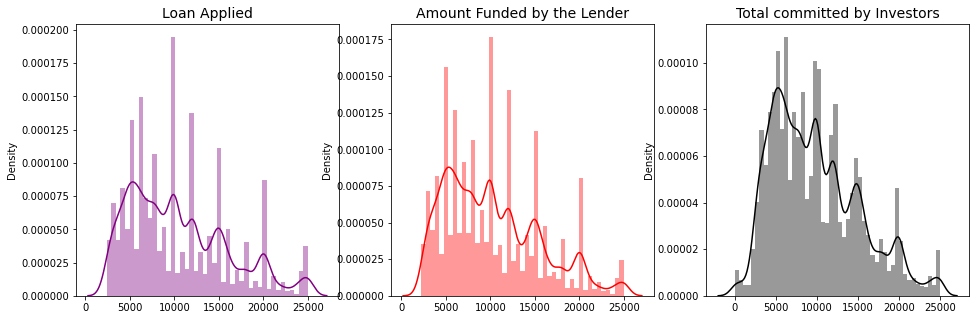

In [77]:
# Let us see their plots
figure, axis = plt.subplots(1, 3, figsize=(16,5))
sns.distplot(loan_main_df["loan_amnt"].values, ax=axis[0], color="purple")
axis[0].set_title("Loan Applied", fontsize=14)

sns.distplot(loan_main_df["funded_amnt"].values, ax=axis[1], color="red")
axis[1].set_title("Amount Funded by the Lender", fontsize=14)

sns.distplot(loan_main_df["funded_amnt_inv"].values, ax=axis[2], color="black")
axis[2].set_title("Total committed by Investors", fontsize=14)
plt.show()

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> We can see a spike in all the graphs between 5000 and 10000 for each figure, also there seems to be significant difference of rows between loan applied by the customer and the amount actually approved by the lended</span>

### -  funded_amnt column


In [78]:
loan_main_df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4340.0,11043.594470,5723.106983,2225.0,6000.0,10000.0,15000.0,25000.0
Fully Paid,26417.0,10050.637847,5229.137280,2200.0,6000.0,9450.0,13500.0,25000.0


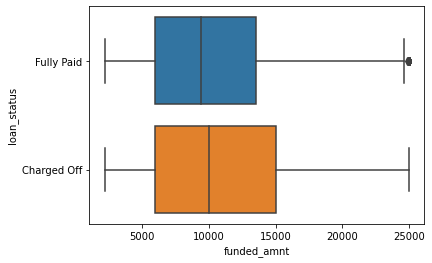

In [79]:
sns.boxplot(x=loan_main_df['funded_amnt'], y = loan_main_df['loan_status'], data=loan_main_df)
plt.show()

##### Creating Derived Metrics as well

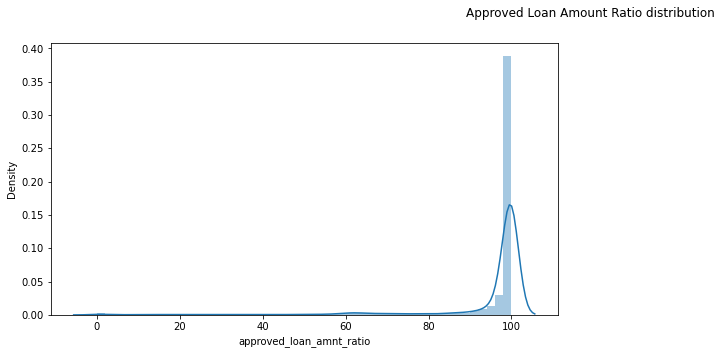

In [80]:
# Let us see the percentage of loans approved by the Lending Club
loan_main_df['approved_loan_amnt_ratio'] = round(loan_main_df.funded_amnt_inv*100/loan_main_df.loan_amnt,2)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=loan_main_df.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li> We will be using funded_amnt for all the future investigation, as this is the actual amount approved by the investors
<li> Charged off loans have higher average of funded amount than the paid off loans.
    </span>

### - emp_length column

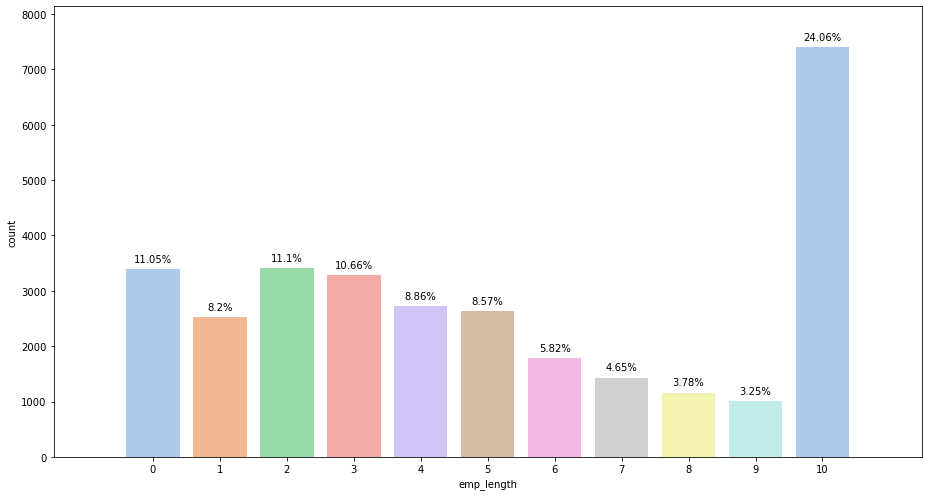

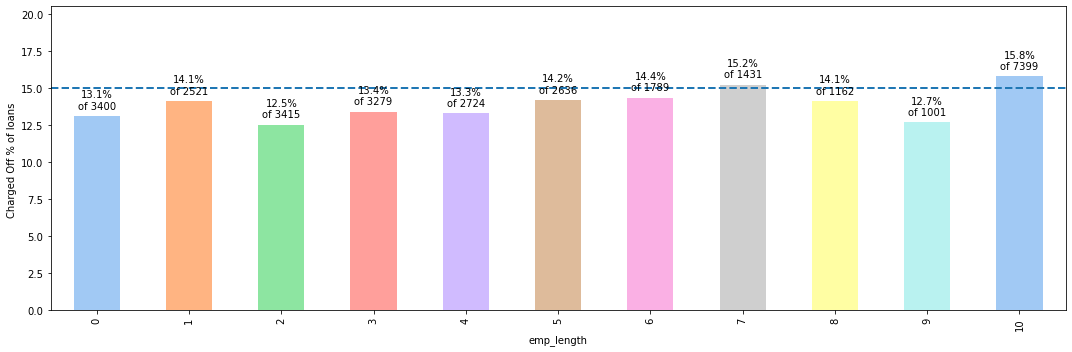

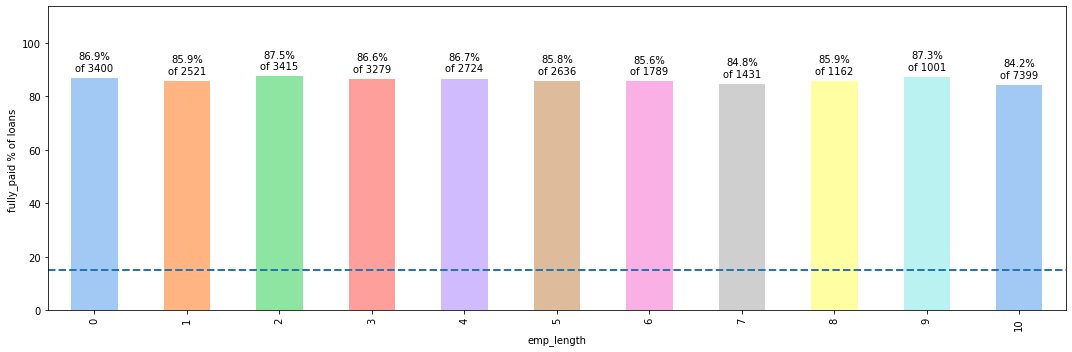

In [81]:
count_plot(loan_main_df,'emp_length')
plot_charged_off(loan_main_df,'emp_length')
plot_fully_paid(loan_main_df,'emp_length')

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li>  Mostly 10 years and above employees apply for loan
<li>  10+ years employees are more likely to default on loan with 15.8%    </li>
</span>


### - issue_d_year, issue_d_month columns w.r.t loan_status as 'Charged Off' & 'Fully Paid'

In [82]:
#making a new dataframe for loans where status is charged off
charged_off_loans=loan_main_df.loc[loan_main_df['loan_status']=='Charged Off']
charged_off_loans['issue_d_year']=charged_off_loans['issue_d_year'].astype(int)

#making a new dataframe for loans where status is Fully Paid
fully_paid_loans = loan_main_df[loan_main_df['loan_status'] == "Fully Paid"]
fully_paid_loans['issue_d_year']=fully_paid_loans['issue_d_year'].astype(int)
#making a new dataframe for loans where status is charged off
loans_of_36_month_term=loan_main_df.loc[loan_main_df['term']==' 36 months']
loans_of_36_month_term['issue_d_year']=loans_of_36_month_term['issue_d_year'].astype(str)

#making a new dataframe for loans where status is Fully Paid
loans_of_60_month_term = loan_main_df[loan_main_df['term'] == ' 60 months']
loans_of_60_month_term['issue_d_year']=loans_of_60_month_term['issue_d_year'].astype(str)

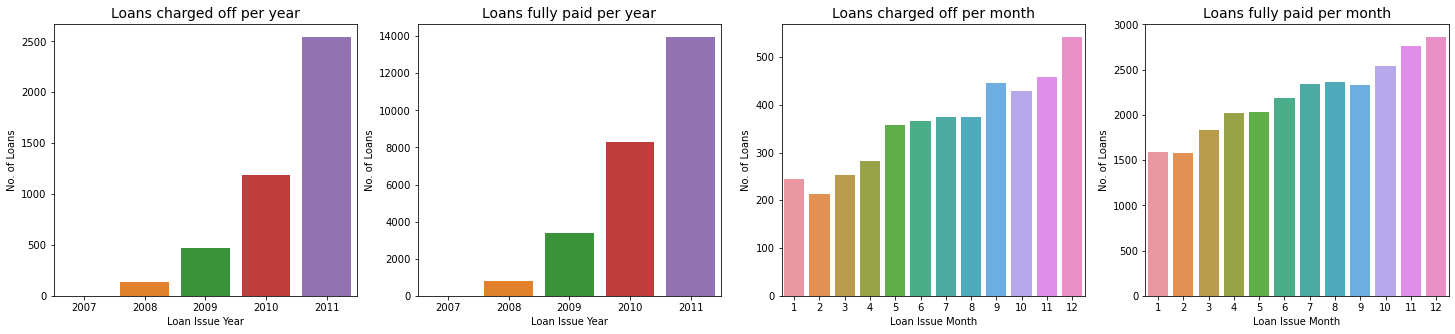

In [83]:
#year wise distribution of loans that are charged off
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(charged_off_loans['issue_d_year'], order=sorted(charged_off_loans.issue_d_year.unique()))
ax1.set_title('Loans charged off per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 2)
ax2=sns.countplot(fully_paid_loans['issue_d_year'], order=sorted(fully_paid_loans.issue_d_year.unique()))
ax2.set_title('Loans fully paid per year', fontsize=14)
ax2.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are charged off
plt.subplot(1, 4, 3)
ax3=sns.countplot(charged_off_loans['issue_d_month'], order=sorted(charged_off_loans.issue_d_month.unique()))
ax3.set_title('Loans charged off per month', fontsize=14)
ax3.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 4)
ax4=sns.countplot(fully_paid_loans['issue_d_month'], order=sorted(fully_paid_loans.issue_d_month.unique()))
ax4.set_title('Loans fully paid per month', fontsize=14)
ax4.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

plt.show()

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li> No. of loans, fully paid and charged off are increasing every year. They are at maximum in the year 2011. This is a very positive trend for Lending Club as the requirement of loans are increasing by each year.
<li> The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of December clearly stating the importance of year-end.</li> </span>

### - Term Column Analysis with loan_amount and loan_status

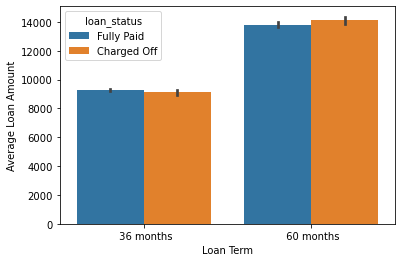

In [84]:
ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan_main_df, estimator=np.mean)
ax.set(xlabel='Loan Term', ylabel='Average Loan Amount')
plt.show()

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li> The avg loan amt is almost same
<li> The avg loan amt is slightly greater for the 60 month term. Although nothing much can be deciphered from these terms</li></span>

### - Annual Income

<span style="color:blue;background-color: #f6f8ff;font-size: large"> We will also use binning or segments to do the analysis </span>

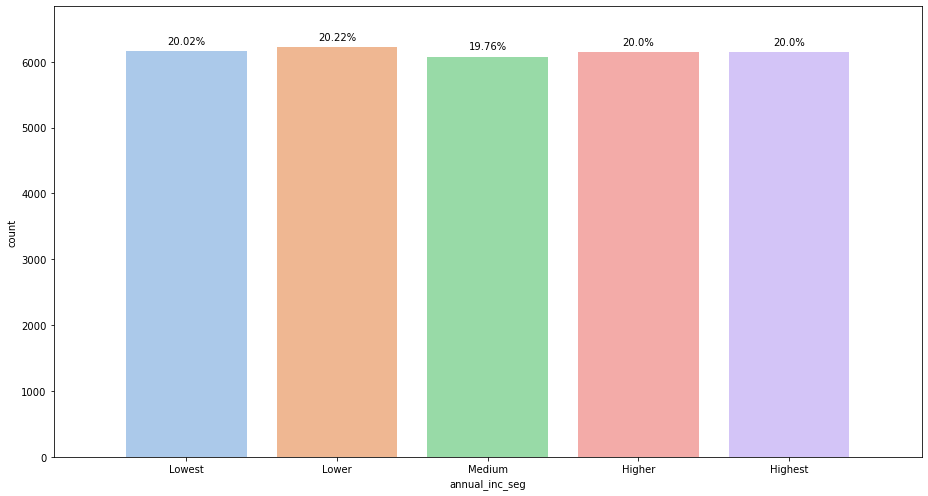

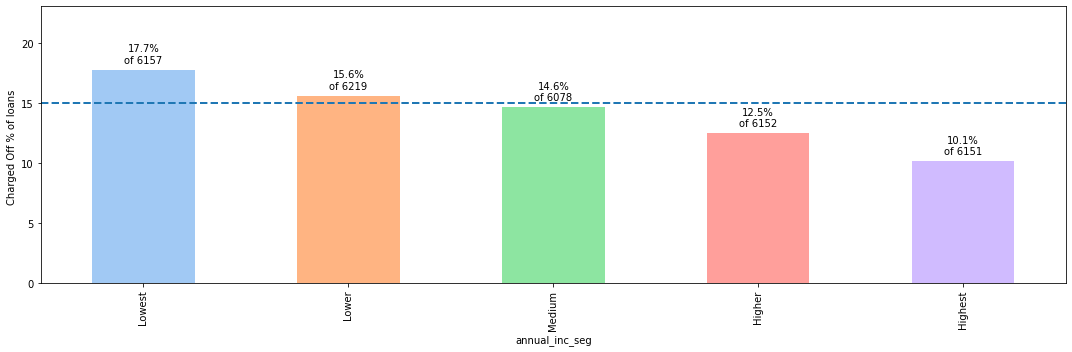

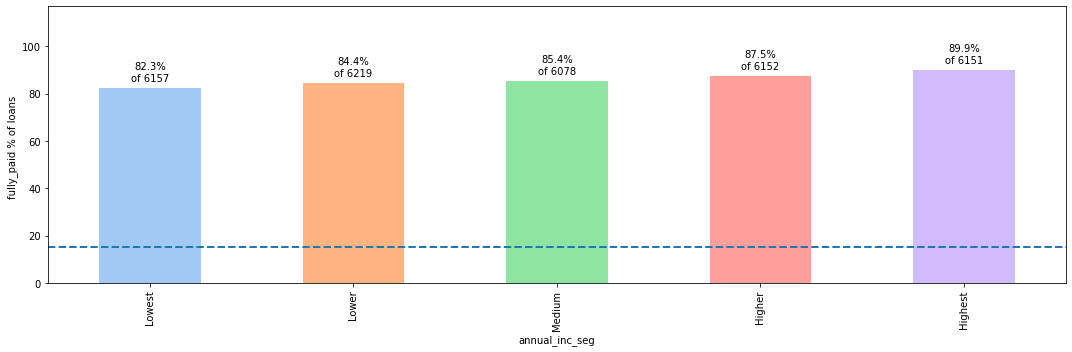

In [85]:
# annual_inc bins
loan_main_df['annual_inc_seg']=pd.qcut(loan_main_df['annual_inc'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
count_plot(loan_main_df,'annual_inc_seg')
plot_charged_off(loan_main_df,'annual_inc_seg')
plot_fully_paid(loan_main_df,'annual_inc_seg')

#### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> Approx 17.7% for lowest and 15.6% for lower income group are in the charged off category, implying they are more susceptible to charge off </span>

### - revol_bal column analysis

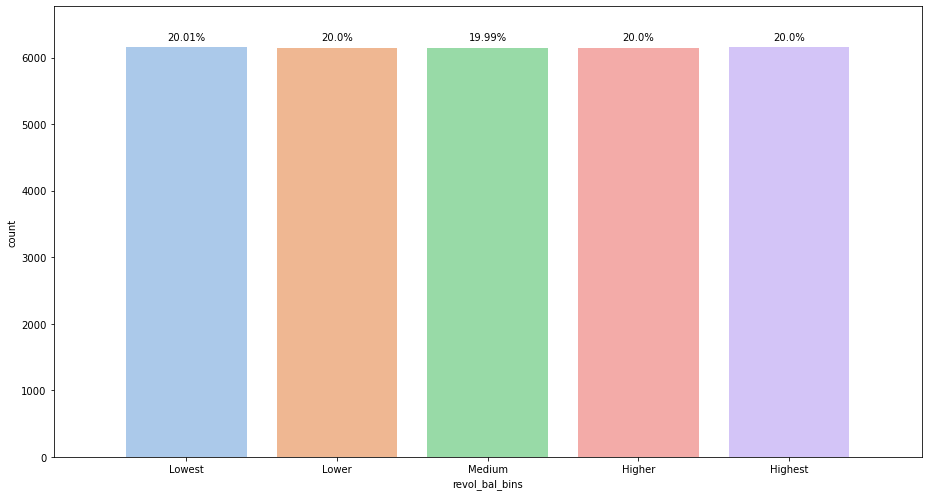

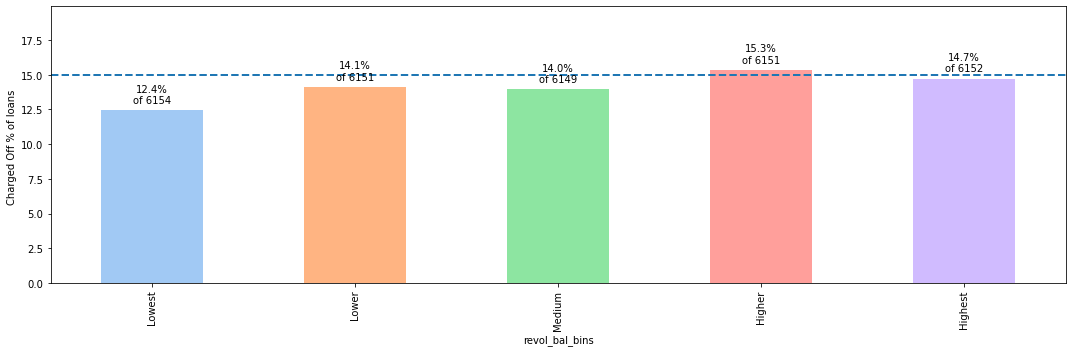

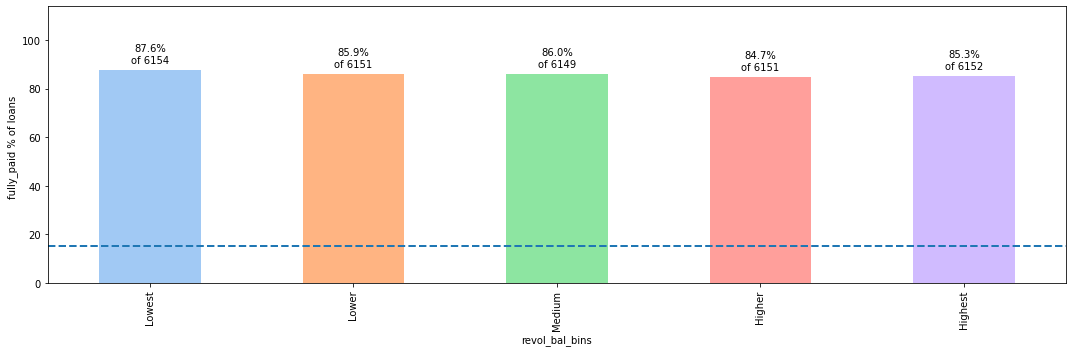

In [96]:
#revol_bal bins
loan_main_df['revol_bal_bins']=pd.qcut(loan_main_df['revol_bal'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
count_plot(loan_main_df,'revol_bal_bins')
plot_charged_off(loan_main_df,'revol_bal_bins')
plot_fully_paid(loan_main_df,'revol_bal_bins')

#### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> Higher the revolving balance, more is the probability of being charged off </span>

### - int_rate columns

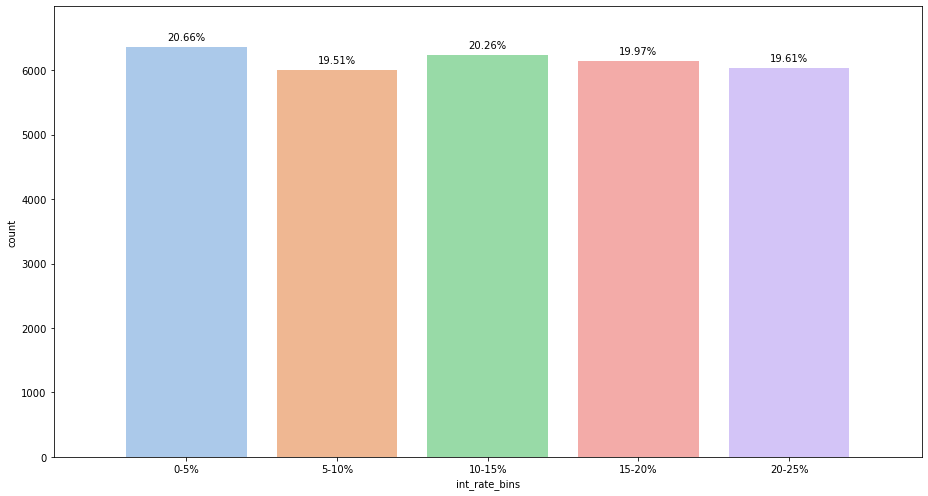

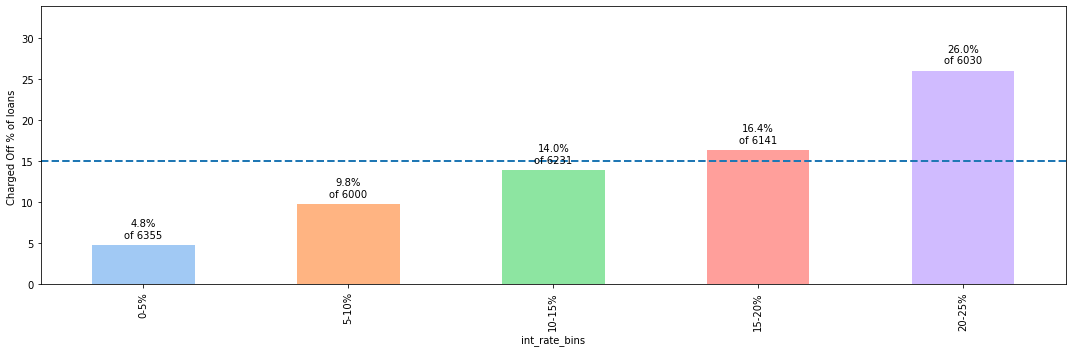

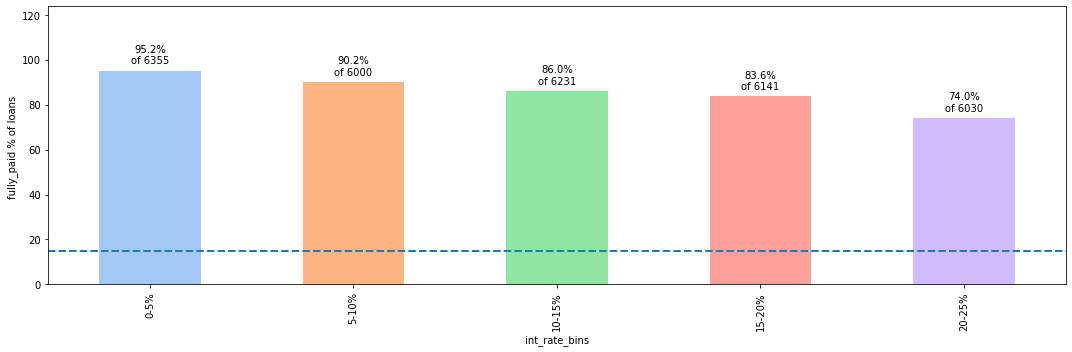

In [87]:
#Data Driven metrics fir percentages
loan_main_df['int_rate_bins']=pd.qcut(loan_main_df['int_rate'], q=5, labels=[str(y)+'-'+str(y+5)+'%' for y in range (0, 25, 5)])
count_plot(loan_main_df,'int_rate_bins')
plot_charged_off(loan_main_df,'int_rate_bins')
plot_fully_paid(loan_main_df,'int_rate_bins')

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> For a high percentage loans, they are more susceptible to default, loan with int rate as 20.25% had default rate of 26% </span>

### - Analysis of Purpose of loan w.r.t % of loans charged off and no. of loan applicants

In [88]:
# Defining some reusable functions
def crosstab(df,col):
    '''
    df : Dataframe
    col: Column Name
    '''
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab
def bivariate_prob(df,col,stacked= True):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()
def bivariate_heatmap (*, data=loan_main_df, x, y, title=None,fig=(10,8)):
    fig, ax = plt.subplots(figsize=fig)
    pt = pd.pivot_table(data=data, values='loan_status_numerical', index=y, columns=x,aggfunc=sum)
    sns.heatmap(pt, ax=ax, cmap='PuBuGn')
    if title is not None:
        plt.title(title)
    plt.show()   

In [89]:
## Convert loan_status column to numerical value so that aggregation may appy over it 
# assign 1 for charged off loans and 0 for fully paid off
loan_main_df['loan_status_numerical'] = loan_main_df['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_main_df['loan_status_numerical']=loan_main_df['loan_status_numerical'].astype('int')

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,129,1080,1209,10.670
credit_card,457,3748,4205,10.868
debt_consolidation,2203,12658,14861,14.824
educational,36,165,201,17.910
home_improvement,255,1928,2183,11.681
house,48,243,291,16.495
major_purchase,166,1511,1677,9.899
medical,81,454,535,15.140
moving,63,339,402,15.672


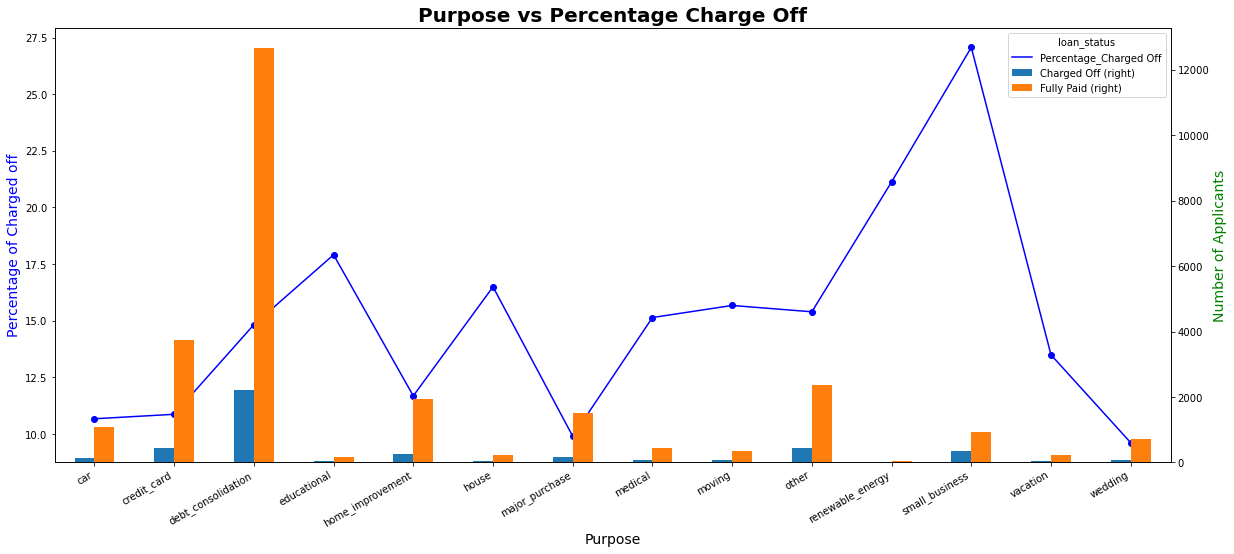

In [90]:
display(crosstab(loan_main_df,'purpose'))
bivariate_prob(loan_main_df,'purpose',False) 

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li> Max loans i.e. 14861 are accepted for the purpose of Debt Consolidation out of which 12658 are fully paid and 2203 are charged off i.e. 14.823%
<li> Maximum % of a loan being charged off is for the purpose of small business and the % is 27.067</li></span>

### -  Analysis of funded_amnt vs Loan Applications

In [91]:
#Making bins for Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
loan_main_df['funded_amnt_range'] = pd.cut(loan_main_df['funded_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
funded_amnt_range,,,,
0-5000,829,5554,6383,12.988
5000-10000,1477,10387,11864,12.449
10000-15000,1040,6323,7363,14.125
15000-20000,712,3182,3894,18.285
20000-25000,282,971,1253,22.506


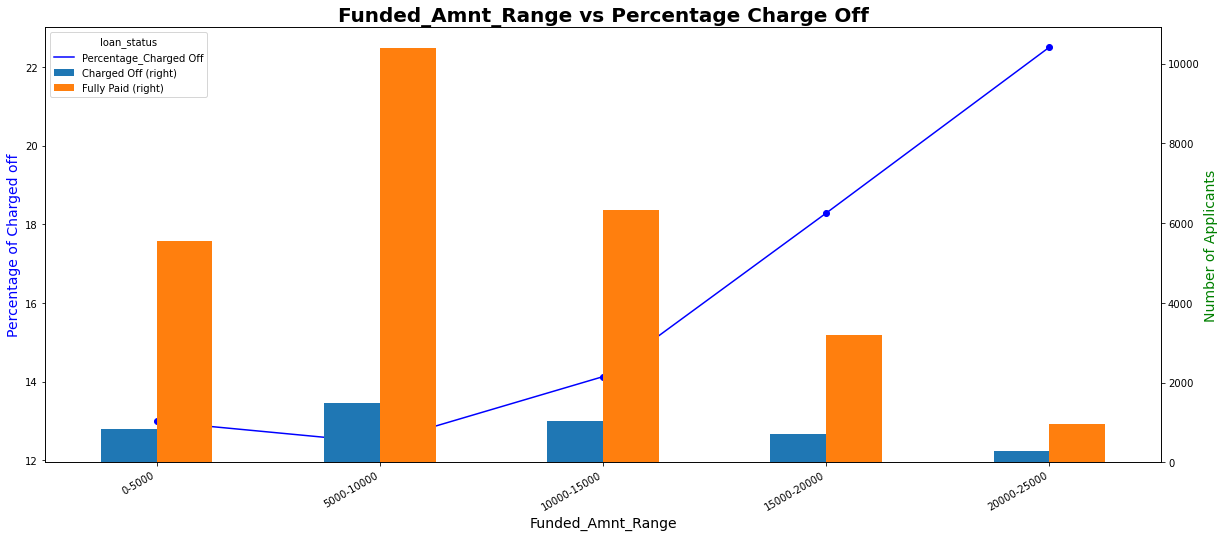

In [92]:
#Plotting the loan amount w.r.t % of loans charged off and no. of loan applicants. 
funded_amnt_range = crosstab(loan_main_df,'funded_amnt_range')
display(funded_amnt_range)

bivariate_prob(loan_main_df,'funded_amnt_range',False) 

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li> As the funded_amnt_range increases, The probablity of loan being charged off increases. It is maximum, 22.506% for the amount of 20000-25000
<li> The maximum no. of loans, 11864 are approved where the funded_amnt_range ranges between 5000-10000</li> </span>

### - Correlation metrics - Bivariate on imp continous columns

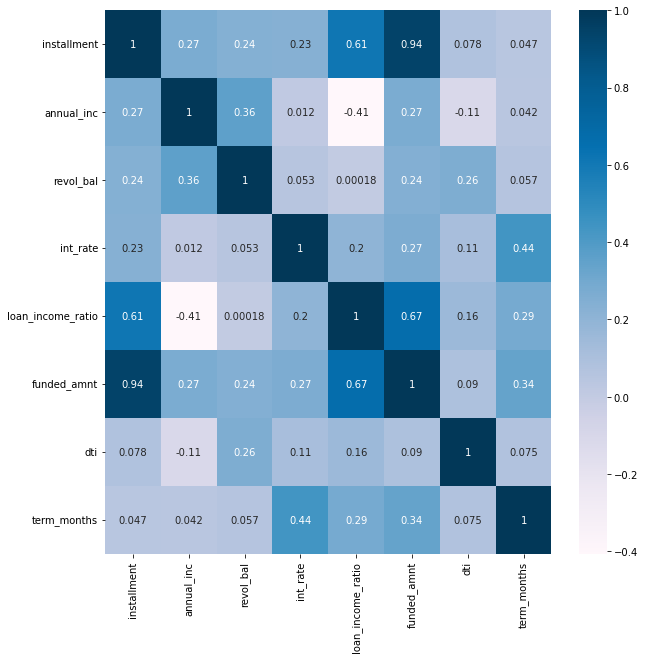

In [93]:
#Finding correlation matric
# Let us create a new column "term months" from "term" and change it's datatype to int
loan_main_df['term_months'] = loan_main_df['term'].str.rstrip('months')
loan_main_df['term_months'] = loan_main_df['term_months'].astype(np.int)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(loan_main_df[['installment','annual_inc','revol_bal','int_rate','loan_income_ratio','funded_amnt','dti','term_months']].corr(),ax=ax, annot=True,cmap='PuBu')
plt.show()

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large">
<li>Funded amount,installment have very high correlation with the loan income ratio.
<li>Term months and interest rate are positively correlated
<li>Annual income is negatively correlated to dti    </li></span>

### - Analysis of dti and annual income 

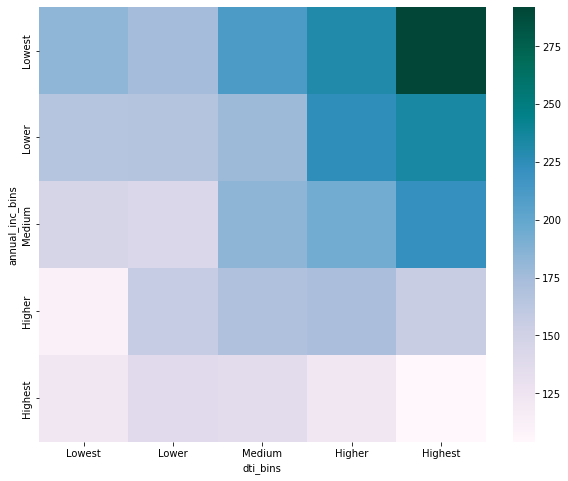

In [94]:
# We will create few derived columns and analyze them
loan_main_df['annual_inc_bins']=pd.qcut(loan_main_df['annual_inc'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
loan_main_df['installment_bins'] = pd.cut(loan_main_df['installment'],[x for x in range(0, 2000, 400)], labels=[str(y)+'-'+str(y+400) for y in range (0,1500,400)])
loan_main_df['dti_bins']=pd.qcut(loan_main_df['dti'], q=5, labels=['Lowest','Lower','Medium','Higher','Highest'])
bivariate_heatmap(x='dti_bins', y='annual_inc_bins')

### Analysis Result
<span style="color:blue;background-color: #f6f8ff;font-size: large"> Chances of defaulting is high for the borrower with lowest income and high dti(debt to income ratio).</span>

### - Analysis of Installment and Annual Income

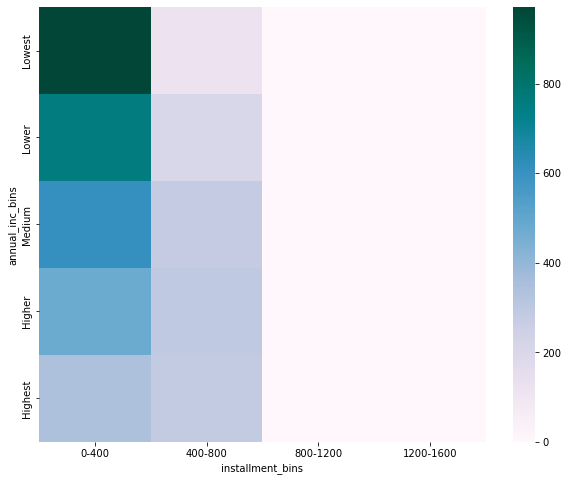

In [95]:
bivariate_heatmap(y='annual_inc_bins', x='installment_bins')

### Analysis Result: 
<span style="color:blue;background-color: #f6f8ff;font-size: large">
Chances of defaulting is high when the borrower has annual income in the lowest segment, even though the installment is lowest too.</span>

## Conclusion
<span style="color:#006400;background-color: #f6f8ff;font-size: large">
    We used Univariate, Segmented Univariate, Derived Metrics, Bivariate Analysis for few important columns which we felt are the driving factors behind loan defaults. We performed Analysis on the following columns and their combination, let's see what analysis did we draw from them:
   <ol>
    <li><b>Loan Status</b>
        <ol>
            <li><b>Analysis:</b> More than 20000 loans have been fully paid which corresponds to 85.89% data and 14.11% loans are charged off</li>
        </ol>
    </li>
    <li><b>Grade Column</b>
        <ol>
            <li><b>Analysis:</b> As we move to lower grade, the count decreases</li>
        </ol>
    </li>
    <li><b>Loan_status and Grade Column together</b>
        <ol>
            <li><b>Analysis:</b> Chances of defaulting increases with grade from A to G and subgrade from A1-A5, B1-B5, & so forth</li>
        </ol>
    </li>
    <li><b>Home Ownership Column</b>
        <ol>
            <li><b>Analysis:</b> People with ownership type as Mortgage and Rent are the most who take loans.
The default rate is high for people having home ownership type "other" and is not significantly impacted by the home ownership status - Mortgage/Owned/Rent</li>
        </ol>
    </li>
    <li><b>Loan Amount or Funded Amount?</b>
        <ol>
            <li><b>Analysis:</b> We will be using funded_amnt column. There seems to be significant difference of rows between loan applied by the customer and the amount actually approved by the lender</li>
        </ol>
    </li>
    <li><b>funded_amnt column</b>
        <ol>
            <li><b>Analysis:</b> Charged off loans have higher average of funded amount than the paid off loans.
70% of Borrowers got 100% loan amount from investors</li>
        </ol>
    </li>
    <li><b>emp_length column</b>
        <ol>
            <li><b>Analysis:</b> Mostly 10 years and above employees apply for loans and they are more likely to default on loan with 15.8%</li>
        </ol>
    </li>
    <li><b>issue_d_year, issue_d_month columns w.r.t loan_status as 'Charged Off' & 'Fully Paid'</b>
        <ol>
            <li><b>Analysis:</b> Maximum in 2011. The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of December clearly stating the importance of year-end</li>
        </ol>
    </li>
    <li><b>Term Column Analysis with loan_amount and loan_status</b>
        <ol>
            <li><b>Analysis:</b> 60 months is an important factor</li>
        </ol>
    </li>
    <li><b>Annual Income</b>
        <ol>
            <li><b>Analysis:</b> Approx 17.7% for lowest and 15.6% for lower income group are in the charged off category, implying they are more susceptible to charge off</li>
        </ol>
    </li>  
    <li><b>revol_ban column analysis</b>
        <ol>
            <li><b>Analysis:</b> Higher the revolving balance, more is the probability of being charged off</li>
        </ol>
    </li>
    <li><b>int_rate columns</b>
        <ol>
            <li><b>Analysis:</b> For a high percentage loans, they are more susceptible to default, loan with int rate as 20.25% had default rate of 26%</li>
        </ol>
    </li>
    <li><b>Analysis of Purpose of loan w.r.t % of loans charged off and no. of loan applicants</b>
        <ol>
            <li><b>Analysis:</b> Max loans i.e. 14861 are accepted for the purpose of Debt Consolidation out of which 12658 are fully paid and 2203 are charged off i.e. 14.823%. Maximum % of a loan being charged off is for the purpose of small business and the % is 27.067</li>
        </ol>
    </li>
    <li><b>Analysis of funded_amnt vs Loan Applications</b>
        <ol>
            <li><b>Analysis:</b> As the funded_amnt_range increases, The probablity of loan being charged off increases. It is maximum, 22.506% for the amount of 20000-25000. The maximum no. of loans, 11864 are approved where the funded_amnt_range ranges between 5000-10000</li>
        </ol>
    </li>
    <li><b>Correlation metrics for all columns - Bivariate on imp continous columns</b>
        <ol>
            <li><b>Analysis:</b> Funded amount,installment have very high correlation with the loan income ratio. Term months and interest rate are positively correlated.Annual income is negatively correlated to dti</li>
        </ol>
    </li>
    <li><b>Analysis of dti and annual income</b>
        <ol>
            <li><b>Analysis:</b> Chances of defaulting is high for the borrower with lowest income and high dti(debt to income ratio)</li>
        </ol>
    </li>  
    <li><b>Analysis of Installment and Annual Income</b>
        <ol>
            <li><b>Analysis:</b> Chances of defaulting is high when the borrower has annual income in the lowest segment, even though the installment is lowest too.</li>
        </ol>
    </li>         
   </ol>    
   </span>

# Recommendations
<span style="color:purple;background-color:#006400;font-size: large"> 
    <ol>
        <li>Lending club should focus more on verifying loans for lower grade loans as the chances of defaulting increases as we move to lower grades of loans.
        </li>
        <li>Small Businesses Loans are mostly charged off, purpose seems to be one of the major driving factors for loan default.
        </li>    
        <li>int_rate also seems to be one of the major driving factors behind loan defaults considering, with increase in int_rate, loans are defaulted more
        </li> 
        <li>loans of tenure 60 months seems to default more and can be considered as a factor i.e longer duration loans   
        </li>
        <li>Income Group is also one of the driving factors behind loan defaults with max number of loan defaults in lower income group, more guard rails can be put to increase the minimum criteria for loan disbursement
        </li>
        <li>Lender's whose employement length is greater than 10 years are mostly charged off, therefore employment_length can also be considered as a driving factor
        </li>
        <li>Home ownership is also one of the key driving factors in driving loan defaultment
        </li>
        <li>Lender's with low income and high dti are more susceptible to defaulting. Also higher installment leads to more defaults.
        </li>
    </ol>
</span>        